Image Data Augmentation
by Keras using Kaggle MNIST
Ref to Francois Chollet's tutorial https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [27]:
# Load Kaggle MNIST data
import pandas as pd
trainDF = pd.read_csv('../input/train.csv')
testDF = pd.read_csv('../input/test.csv')

In [18]:
from keras.preprocessing.image import ImageDataGenerator

In [45]:
import matplotlib.pyplot as plt

In [76]:
datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False,
        fill_mode='nearest')

In [77]:
# Randomly pick one example
x = trainDF.iloc[550,0:784].reshape(1,28,28,1)

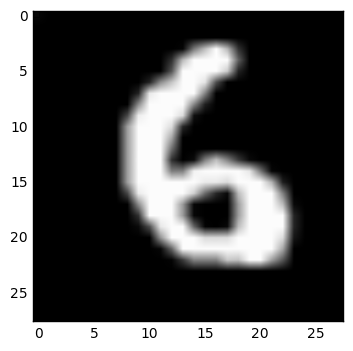

In [78]:
plt.imshow(x[0,:,:,0],cmap='gray');plt.show()

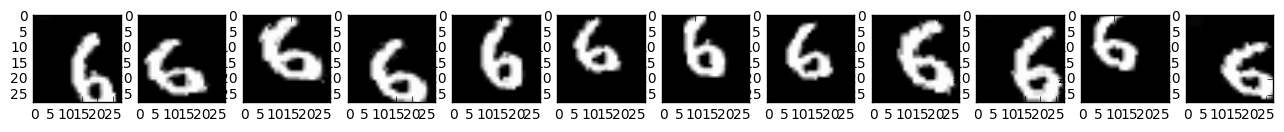

In [113]:
# Interactively play this cell over and over to see the effect of data augmentation
fig,ax = plt.subplots(1,12,figsize=[16,16])
for j in range(12):
    x1=datagen.flow(x, batch_size=1).next()
    #ax[j].set_xticks([])
    #ax[j].set_yticks([])
    ax[j].imshow(x1[0,:,:,0],cmap='gray')    
plt.show()

In [106]:
x.max(),x1.max(),x.min(),x1.min()

(255, 253.0, 0, 0.0)

In [102]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [ ]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
vgg = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_tensor=None, input_shape=None)

In [116]:
pwd

'C:\\Users\\daij12\\Documents\\ml\\kaggle\\digit-recognizer\\mnist'

In [5]:
import numpy as np
X_train = X_train1.reshape((tr_n,1,size,size)).astype('float32')
X_test = X_test1.reshape((tt_n,1,size,size)).astype('float32')
# Assume the max is 255
X_train = X_train / 255
X_test = X_test / 255


In [6]:
from keras.utils import np_utils
Y_train = np_utils.to_categorical(Y_train1)

num_classes = Y_train.shape[1]


print(X_train.shape)
print(Y_train.shape)

Using TensorFlow backend.


(42000, 1, 28, 28)
(42000, 10)


In [7]:
seed = 7
np.random.seed(seed)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D

In [10]:
from keras import backend as K
K.set_image_dim_ordering('th')

In [11]:
def baseline_model():
        # create model
        model = Sequential()
        # MLP model
        #model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))
        #model.add(Dense(num_classes, init='normal', activation='softmax'))
        # CNN model
        model.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(1, size, size), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.2))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))
        # Compile model
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

In [12]:
model = baseline_model()

In [ ]:
N_EPOCH = 10
from keras.wrappers.scikit_learn import KerasClassifier
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=N_EPOCH, batch_size=50, verbose=2)
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
from sklearn.model_selection import cross_val_score
results = cross_val_score(estimator, X_train, Y_train, cv=kfold)
print("Output: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))